<a href="https://colab.research.google.com/github/aleksejalex/ske_assignment/blob/main/SKE_AG_protokol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cíl 1

pomocí parametrických a neparametrických metod pro cenzorovaná data
odhadněte vhodný spolehlivostní model pro časy dožití (survt $T_j$) obou
vybraných podskupin pacientů. Pro kontrolu fitu parametrické rodiny
užijte Kaplan-Meierův plot nebo Nelson-Aalenův 'hazard plot' (nejlépe
v jednom obrázku spolu s parametrickým průběhem), resp. QQ/PP při RC.

In [25]:
#!pip install reliability

In [26]:
# importy balicku
import inspect
import numpy as np
import scipy as scp
import pandas as pd
import seaborn as sbn
import csv
import matplotlib as mpt
import statsmodels
import statsmodels.formula.api as sm
from matplotlib import pyplot as plt
import reliability as rel



def retrieve_name(var):
    "vrati nazev promenne jako string"
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]

examplevarr = 4
print(examplevarr)
print(retrieve_name(examplevarr))

def gauss(x, mi, sigma2):
    "hustota normalniho rozdeleni. x je bud cislo nebo np.array"
    return (1/(np.sqrt(2*np.pi*sigma2)) * np.exp (-  ( (x-mi)**2 ) / (2*sigma2) ) )

4
['examplevarr']


In [27]:
dpi_for_plot = 110
dpi_for_export = 120

In [28]:
# additional settings for plotting images:
#plt.rcParams.update({"figure.dpi": 130})   # increase DPI, default = 96
#%config InlineBackend.figure_format = "svg"  # every plot (matplotlib's or seaborn's) must be a SVG image

In [29]:
# import datasetu (pomoci Pandas)
# (dataset stazen z >>    )
url = "https://raw.githubusercontent.com/aleksejalex/ske_assignment/main/dataset/Data%20set%20SKE_VeteranClinicTrial_modif-RC_final4_dataset_edited_for_import_to_python.csv?token=GHSAT0AAAAAABY6GWJWO6ADKPS5D4UAOH6KY7YPZGQ"
imported_data = pd.read_csv(url)

imported_data
#data.info

,treat,cell,survt,cens,KAR,didur,age,prith
0,1,1,72,0,60,7,69,0
1,1,1,411,1,70,5,64,10
2,1,1,228,1,60,3,38,0
3,1,1,126,1,60,9,63,10
4,1,1,118,1,70,11,65,10
5,1,1,10,1,20,5,49,0
6,1,1,82,1,40,10,69,10
7,1,1,110,0,80,29,68,0
8,1,1,314,1,50,18,43,0
9,1,1,100,0,70,6,70,0


In [30]:
imported_data.describe()

,treat,cell,survt,cens,KAR,didur,age,prith
count,137,137,137,137,137,137,137,137
mean,1.49635,2.33577,121.628,0.744526,58.5693,8.77372,58.3066,2.91971
std,0.501821,1.06604,157.817,0.437728,20.0396,10.6121,10.5416,4.56337
min,1,1,1,0,10,1,34,0
25%,1,1,25,0,40,3,51,0
50%,1,2,80,1,60,5,62,0
75%,2,3,144,1,75,11,66,10
max,2,4,999,1,99,87,81,10


In [31]:
imported_data.describe().round(2).to_latex(float_format="%.2f")

'\\begin{tabular}{lrrrrrrrr}\n\\toprule\n & treat & cell & survt & cens & KAR & didur & age & prith \\\\\n\\midrule\ncount & 137.00 & 137.00 & 137.00 & 137.00 & 137.00 & 137.00 & 137.00 & 137.00 \\\\\nmean & 1.50 & 2.34 & 121.63 & 0.74 & 58.57 & 8.77 & 58.31 & 2.92 \\\\\nstd & 0.50 & 1.07 & 157.82 & 0.44 & 20.04 & 10.61 & 10.54 & 4.56 \\\\\nmin & 1.00 & 1.00 & 1.00 & 0.00 & 10.00 & 1.00 & 34.00 & 0.00 \\\\\n25% & 1.00 & 1.00 & 25.00 & 0.00 & 40.00 & 3.00 & 51.00 & 0.00 \\\\\n50% & 1.00 & 2.00 & 80.00 & 1.00 & 60.00 & 5.00 & 62.00 & 0.00 \\\\\n75% & 2.00 & 3.00 & 144.00 & 1.00 & 75.00 & 11.00 & 66.00 & 10.00 \\\\\nmax & 2.00 & 4.00 & 999.00 & 1.00 & 99.00 & 87.00 & 81.00 & 10.00 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [32]:
# moje data: vse, kde cell=2
data = pd.DataFrame()
data = imported_data[imported_data['cell']==2]

data.describe()

,treat,cell,survt,cens,KAR,didur,age,prith
count,48,48,48,48,48,48,48,48
mean,1.375,2,71.6667,0.75,53.5417,9.25,59.875,2.29167
std,0.489246,0,85.7749,0.437595,19.101,13.9093,9.92016,4.24744
min,1,2,2,0,20,1,35,0
25%,1,2,20,0.75,40,2,54.75,0
50%,1,2,51,1,60,4,62.5,0
75%,2,2,97.5,1,70,11,67,0
max,2,2,392,1,85,87,72,10


In [33]:
data.describe().round(2).to_latex(float_format="%.2f")

'\\begin{tabular}{lrrrrrrrr}\n\\toprule\n & treat & cell & survt & cens & KAR & didur & age & prith \\\\\n\\midrule\ncount & 48.00 & 48.00 & 48.00 & 48.00 & 48.00 & 48.00 & 48.00 & 48.00 \\\\\nmean & 1.38 & 2.00 & 71.67 & 0.75 & 53.54 & 9.25 & 59.88 & 2.29 \\\\\nstd & 0.49 & 0.00 & 85.77 & 0.44 & 19.10 & 13.91 & 9.92 & 4.25 \\\\\nmin & 1.00 & 2.00 & 2.00 & 0.00 & 20.00 & 1.00 & 35.00 & 0.00 \\\\\n25% & 1.00 & 2.00 & 20.00 & 0.75 & 40.00 & 2.00 & 54.75 & 0.00 \\\\\n50% & 1.00 & 2.00 & 51.00 & 1.00 & 60.00 & 4.00 & 62.50 & 0.00 \\\\\n75% & 2.00 & 2.00 & 97.50 & 1.00 & 70.00 & 11.00 & 67.00 & 0.00 \\\\\nmax & 2.00 & 2.00 & 392.00 & 1.00 & 85.00 & 87.00 & 72.00 & 10.00 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [34]:
data[data['cens']==0]

,treat,cell,survt,cens,KAR,didur,age,prith
20,1,2,123,0,40,3,55,0
21,1,2,97,0,60,5,67,0
23,1,2,59,0,30,2,65,0
29,1,2,21,0,40,2,55,10
31,1,2,139,0,80,2,64,0
35,1,2,287,0,60,25,66,10
38,1,2,122,0,80,28,53,0
40,1,2,54,0,70,1,67,0
90,2,2,103,0,70,22,36,10
96,2,2,7,0,20,11,66,0


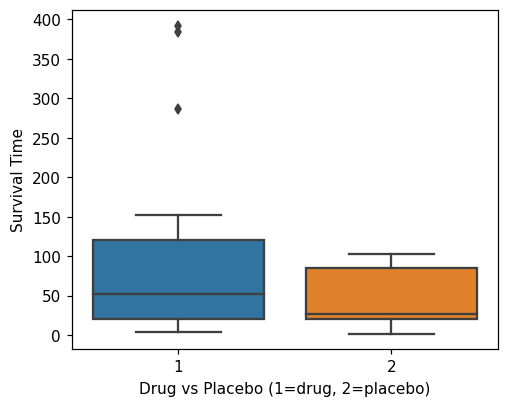

In [35]:
plt.figure(figsize=(5, 4), dpi=dpi_for_plot)
sbn.boxplot(x='treat', y='survt', data=data)
plt.xlabel('Drug vs Placebo (1=drug, 2=placebo)')
plt.ylabel('Survival Time')
plt.suptitle('')
plt.title('')
plt.savefig('protokol/img/boxplot_drug_vs_placebo.png', dpi=dpi_for_export)
plt.show()

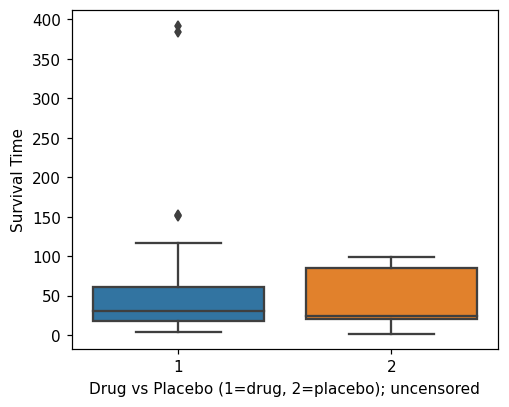

In [36]:
plt.figure(figsize=(5, 4), dpi=dpi_for_plot)
sbn.boxplot(x='treat', y='survt', data=data[data.cens==1])
plt.xlabel('Drug vs Placebo (1=drug, 2=placebo); uncensored')
plt.ylabel('Survival Time')
plt.suptitle('')
plt.title('')
plt.savefig('protokol/img/boxplot_drug_vs_placebo_uncensored.png', dpi=dpi_for_export)
plt.show()

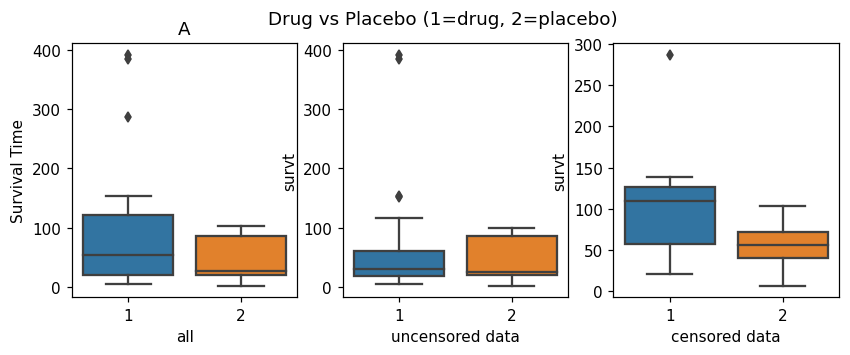

In [37]:
plt.subplots(figsize = (9,3), dpi=dpi_for_plot, nrows=1, ncols=3)
plt.subplot(131)
sbn.boxplot(x='treat', y='survt', data=data)
plt.xlabel('all')
plt.ylabel('Survival Time')
plt.title('A')
plt.subplot(132)
sbn.boxplot(x='treat', y='survt', data=data[data.cens==1])
plt.xlabel('uncensored data')
#plt.ylabel('Survival Time')
plt.suptitle('')
plt.subplot(133)
sbn.boxplot(x='treat', y='survt', data=data[data.cens==0])
plt.xlabel('censored data')
#plt.ylabel('Survival Time')
plt.suptitle('Drug vs Placebo (1=drug, 2=placebo)')
plt.title('')
plt.savefig('protokol/img/boxplot_drug_vs_placebo_BOTH.png', dpi=dpi_for_export)
plt.show()

z toho bych usoudil, že experiment neprobíhal dost dlouho pro tuto skupinu pacientů (cell=2): je vidět, že pacienti, kteří přežili do konce experimentu

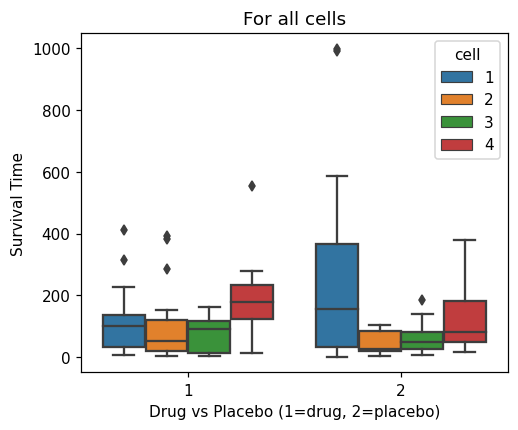

In [38]:
plt.figure(figsize=(5, 4), dpi=dpi_for_plot)
sbn.boxplot(x='treat', y='survt', data=imported_data, hue='cell')
plt.xlabel('Drug vs Placebo (1=drug, 2=placebo)')
plt.ylabel('Survival Time')
plt.suptitle('')
plt.title('For all cells')
plt.savefig('protokol/img/boxplot_drug_vs_placebo_whole_dataset.png', dpi=dpi_for_export)
plt.show()

## jake obrazky maji smysl? vek? lecba? co od ceho?

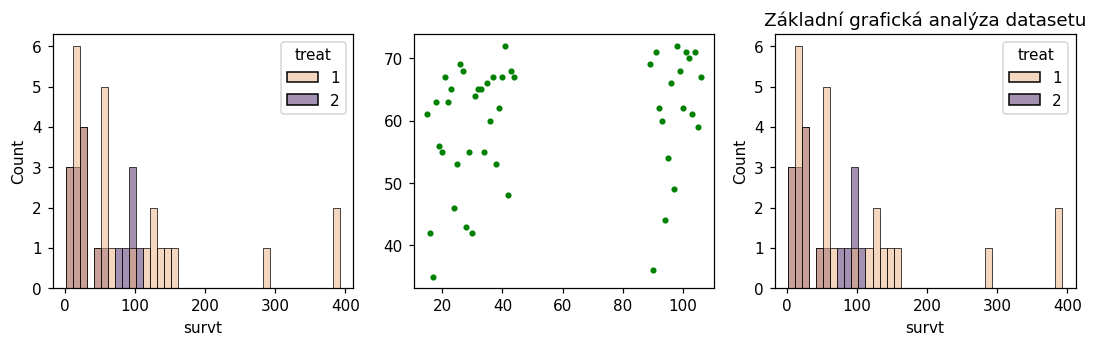

In [39]:
plt.subplots(figsize = (12,3), dpi=dpi_for_plot, nrows=1, ncols=3)
plt.subplot(131)
sbn.histplot(data=data, x='survt', binwidth=10, hue='treat', palette='flare')
plt.subplot(132)
plt.plot(data.age, '.' ,color='green')
plt.subplot(133)
sbn.histplot(data=data, x='survt', binwidth=10, hue='treat', palette='flare')
plt.title('Základní grafická analýza datasetu')
plt.savefig('protokol/img/basic_data_analysis.png', dpi=dpi_for_export)
plt.show()

In [40]:
data_drug = pd.DataFrame()
data_drug = data[data['treat']==1]
data_placebo = pd.DataFrame()
data_placebo = data[data['treat']==2]

Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 22/8 (26.66667% right censored) 

   Distribution   Alpha     Beta   Gamma Alpha 1   Beta 1 Alpha 2  Beta 2 Proportion 1 DS      Mu   Sigma     Lambda  Log-likelihood    AICc     BIC      AD optimizer
       Gamma_3P 270.719 0.498064  3.9999                                                                                    -120.394 247.711 250.991 3.78279       TNC
     Weibull_3P 106.134  0.61087  3.9999                                                                                    -120.934 248.792 252.073 3.65602       TNC
Weibull_Mixture                           56.568  1.09815 389.964 116.374     0.758537                                      -118.037 248.573 253.079 3.59253    powell
 Loglogistic_3P 57.7984 0.775869  3.9999                                                                                    -122.664 252.251 255.532 3.53831       TNC
     Weibull_CR                          128.491 0.744

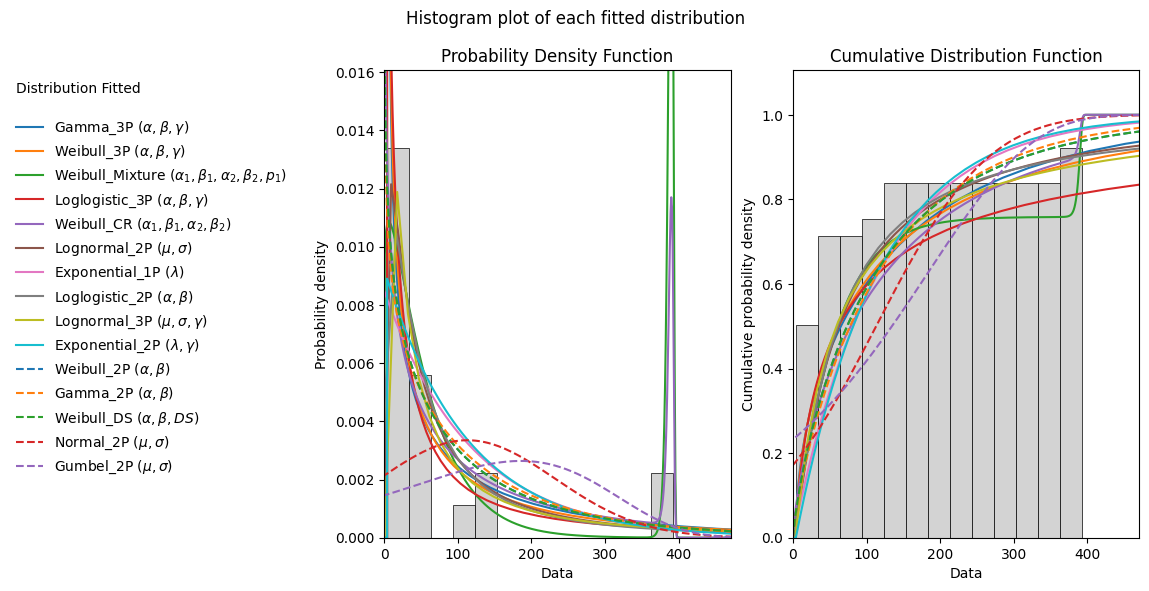

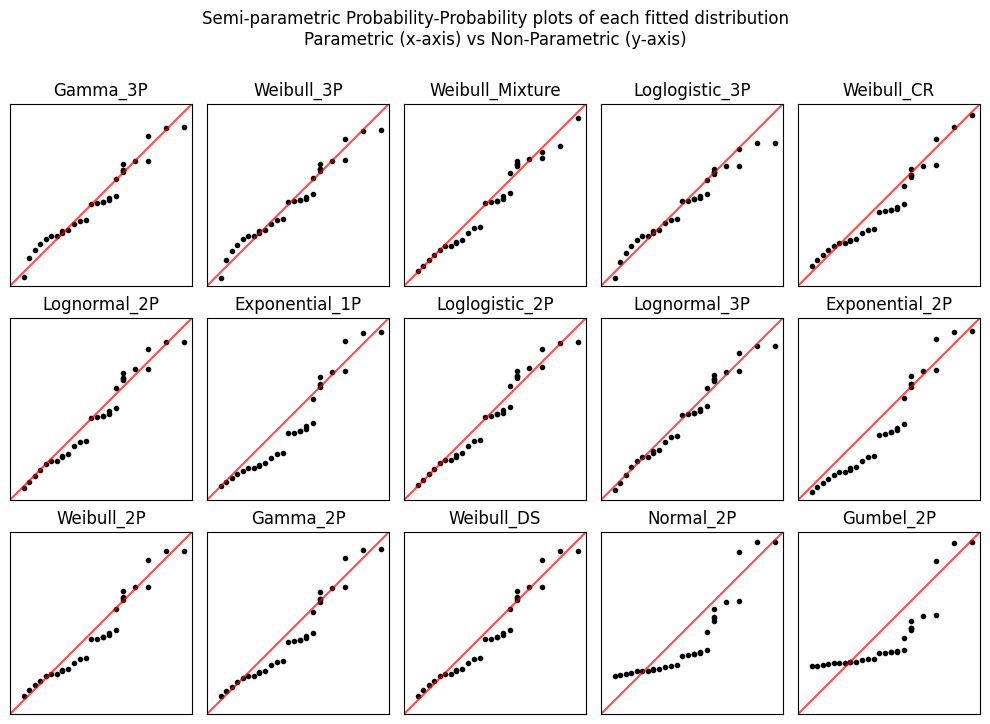

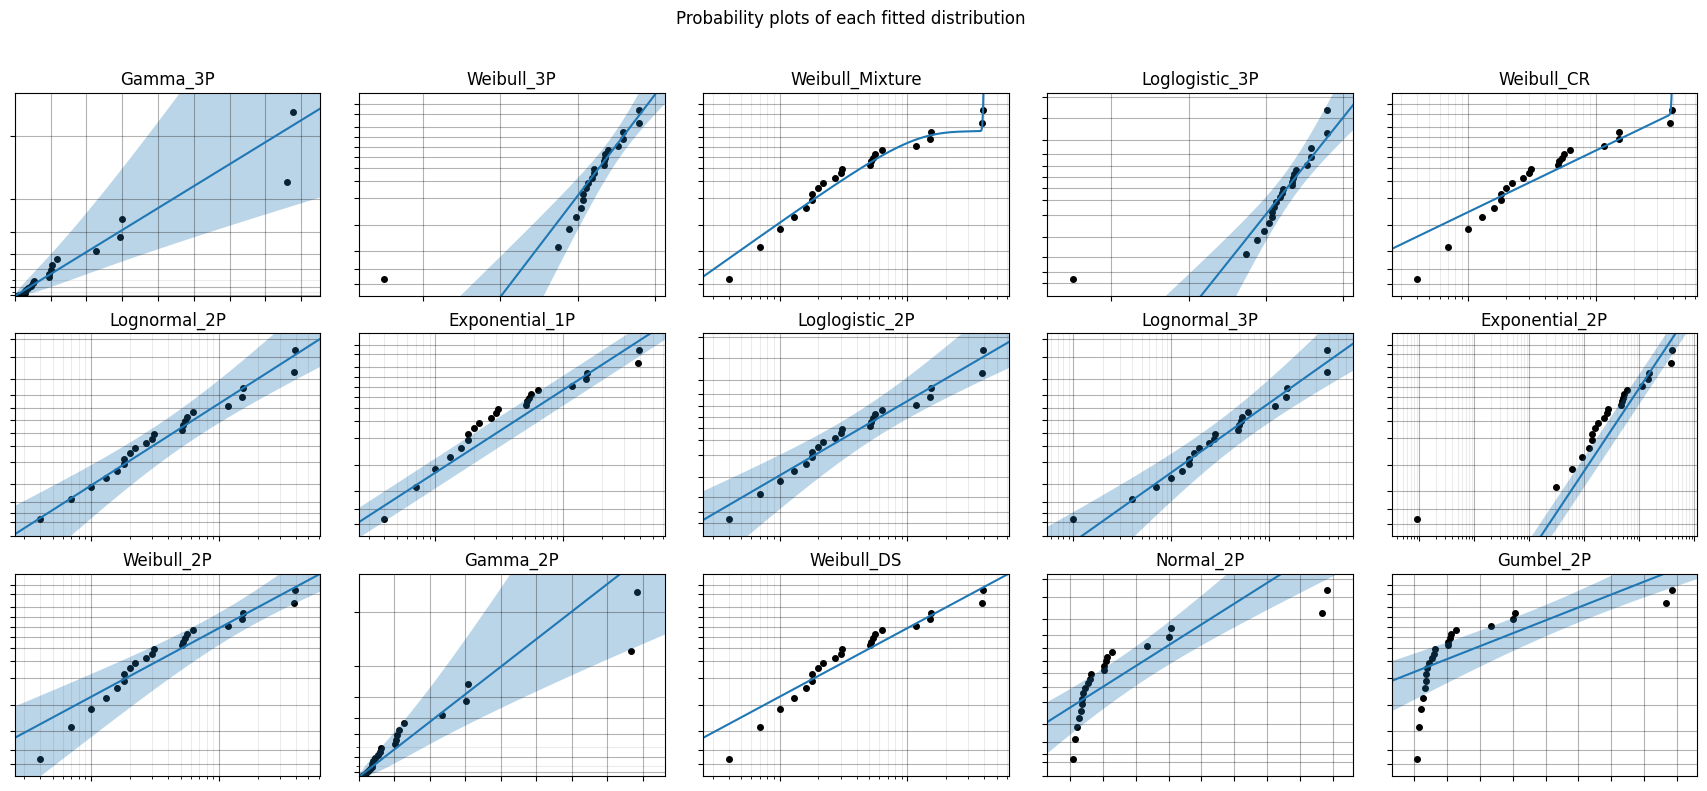

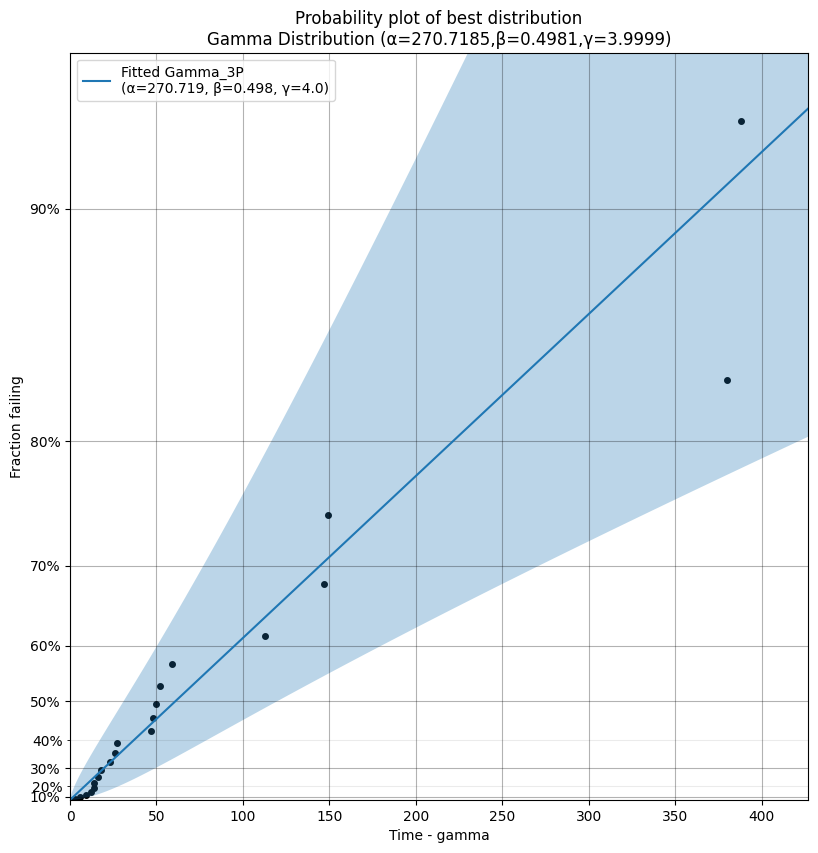

The best fitting distribution was Gamma_3P  which had parameters  [270.71853611   0.49806422   3.9999    ]


<Figure size 640x480 with 0 Axes>

In [41]:
from reliability.Fitters import Fit_Everything
from reliability.Distributions import Weibull_Distribution
from reliability.Other_functions import make_right_censored_data

results_drug = Fit_Everything(failures=data_drug[data_drug['cens']==1].survt.values, right_censored=data_drug[data_drug['cens']==0].survt.values)
print('The best fitting distribution was', results_drug.best_distribution_name, ' which had parameters ', results_drug.best_distribution.parameters)
plt.savefig('protokol/img/fitall_datadrug_censored.png', dpi=dpi_for_export)

In [51]:
results_drug.probability_plot.savefig('protokol/img/fiteverything_drug_PP_plots.png', dpi=dpi_for_export*1.4)

Results from Fit_Lognormal_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 22/8 (26.66667% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
       Mu         4.12884        0.270364   3.59893   4.65874
    Sigma         1.39198        0.217242   1.02516   1.89007 

Goodness of fit    Value
 Log-likelihood -124.588
           AICc   253.62
            BIC  255.978
             AD  3.60495 

Results from Fit_Gamma_3P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 22/8 (26.66667% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         270.719         121.165   112.603   650.861
     Beta        0.498064        0.115732  0.315862  0.785369
    Gamma          3.9999     0.000139302   3.99963   4.00017 

Goodness of fit    Value
 Log-likelihood -120.394
           AICc  247.711
            BIC  250.991
 

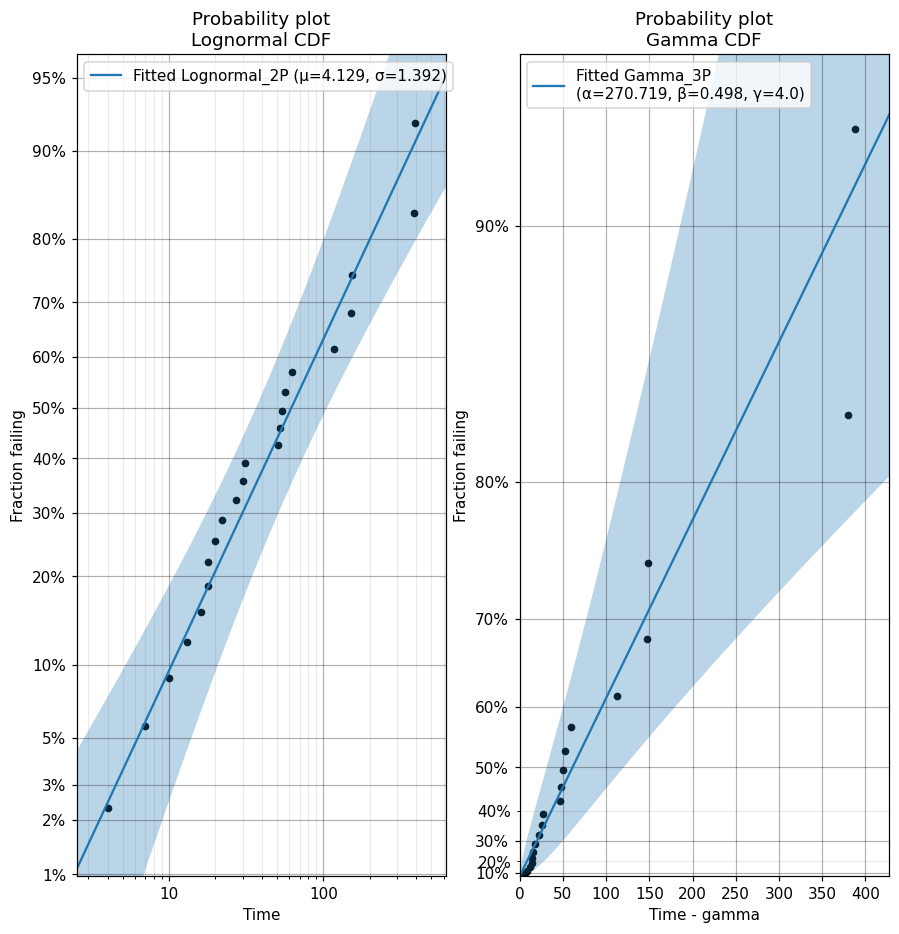

In [53]:
from reliability.Fitters import Fit_Lognormal_2P
from reliability.Fitters import Fit_Gamma_3P
from reliability.Other_functions import make_right_censored_data, histogram

plt.figure(figsize=(6,3), dpi=dpi_for_plot)
plt.subplot(121)
fitted_drugs_logNorm2p = Fit_Lognormal_2P(failures=data_drug[data_drug['cens']==1].survt.values, right_censored=data_drug[data_drug['cens']==0].survt.values).distribution
plt.subplot(122)
fitted_drugs_Gamma3p = Fit_Gamma_3P(failures=data_drug[data_drug['cens']==1].survt.values, right_censored=data_drug[data_drug['cens']==0].survt.values).distribution
plt.savefig('protokol/img/fitted_drugs_logNorm_and_Gamma.png', dpi=dpi_for_export)

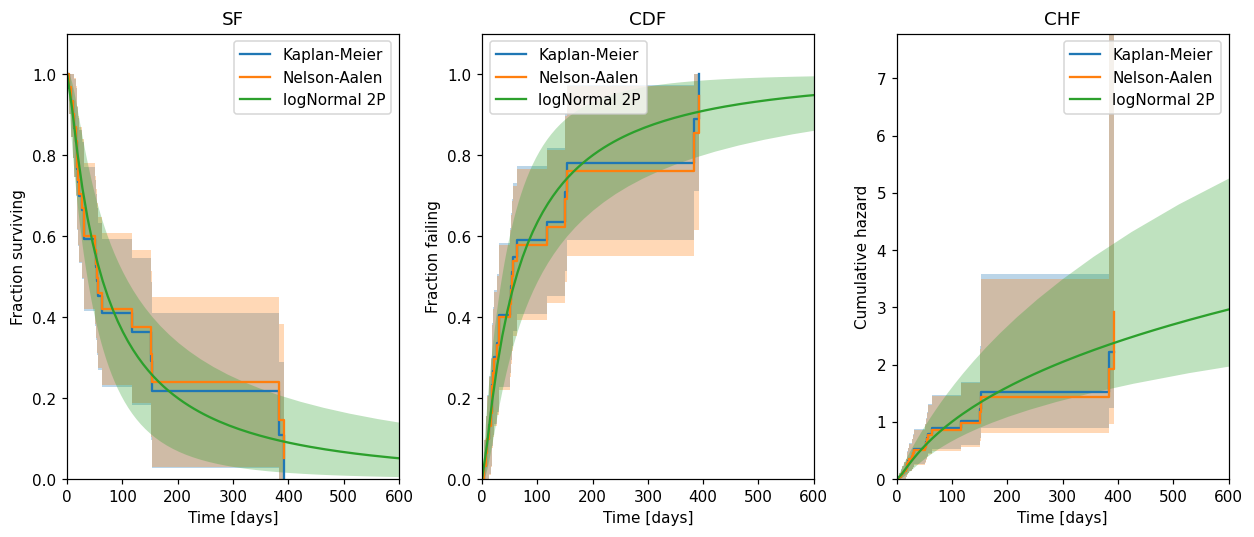

In [56]:
from reliability.Nonparametric import KaplanMeier, NelsonAalen

plt.figure(figsize=(12, 5), dpi=dpi_for_plot)
plt.subplot(131)
KaplanMeier(failures=data_drug[data_drug['cens']==1].survt.values, right_censored=data_drug[data_drug['cens']==0].survt.values, plot_type='SF', print_results=False, label='Kaplan-Meier')
NelsonAalen(failures=data_drug[data_drug['cens']==1].survt.values, right_censored=data_drug[data_drug['cens']==0].survt.values, label='Nelson-Aalen', print_results=False, plot_type='SF')
fitted_drugs_logNorm2p.SF(label='logNormal 2P')
plt.xlim(0,600)
plt.xlabel('Time [days]')
plt.legend()
plt.title('SF')
plt.subplot(132)
KaplanMeier(failures=data_drug[data_drug['cens']==1].survt.values, right_censored=data_drug[data_drug['cens']==0].survt.values, plot_type='CDF', print_results=False, label='Kaplan-Meier')
NelsonAalen(failures=data_drug[data_drug['cens']==1].survt.values, right_censored=data_drug[data_drug['cens']==0].survt.values, label='Nelson-Aalen', print_results=False, plot_type='CDF')
fitted_drugs_logNorm2p.CDF(label='logNormal 2P')
plt.xlim(0,600)
plt.xlabel('Time [days]')
plt.legend()
plt.title('CDF')
plt.subplot(133)
KaplanMeier(failures=data_drug[data_drug['cens']==1].survt.values, right_censored=data_drug[data_drug['cens']==0].survt.values, plot_type='CHF', print_results=False, label='Kaplan-Meier')
NelsonAalen(failures=data_drug[data_drug['cens']==1].survt.values, right_censored=data_drug[data_drug['cens']==0].survt.values, label='Nelson-Aalen', print_results=False, plot_type='CHF')
fitted_drugs_logNorm2p.CHF(label='logNormal 2P')
plt.xlim(0,600)
plt.xlabel('Time [days]')
plt.legend()
plt.title('CHF')
plt.subplots_adjust(left=0.07, right=0.95, top=0.92, wspace=0.25)  # format the plot layout
plt.savefig('protokol/img/four_men_drugs.png', dpi=dpi_for_export)
plt.show()

## placebo pacienti

Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 14/4 (22.22222% right censored) 

   Distribution   Alpha     Beta    Gamma Alpha 1   Beta 1 Alpha 2  Beta 2 Proportion 1 DS      Mu   Sigma    Lambda  Log-likelihood    AICc     BIC      AD optimizer
Weibull_Mixture                           20.7431  2.22503  98.212 12.9256     0.528143                                     -63.6664 142.333 141.785 6.16063       TNC
       Gamma_3P 118.424 0.548677   1.9999                                                                                   -68.4463 144.607 145.564 6.82239       TNC
 Exponential_1P                                                                                              0.01649          -71.47  145.19  145.83 6.43969       TNC
     Weibull_CR                           86.3238 0.855303 100.283 17.2318                                                  -67.4178 145.913 146.397  6.2595       TNC
 Exponential_2P                    1.9999             

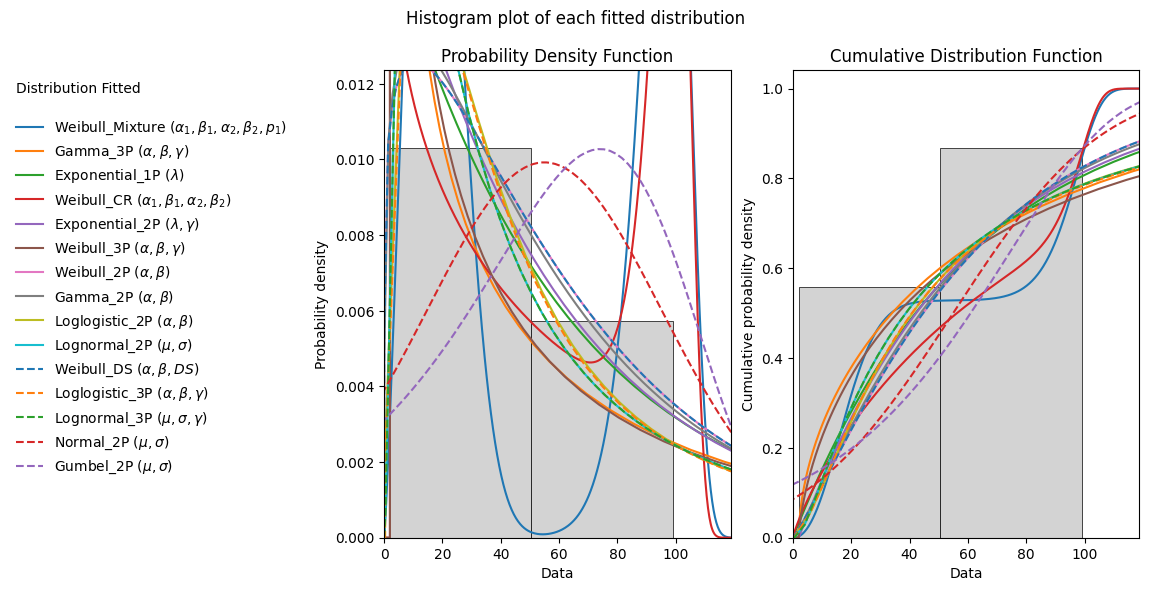

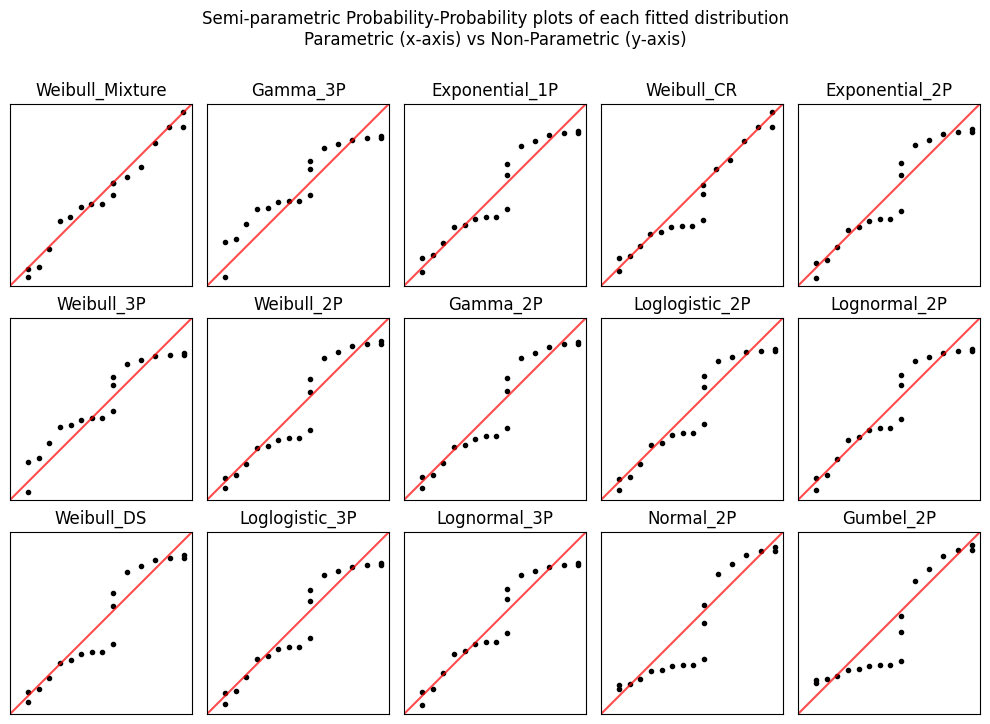

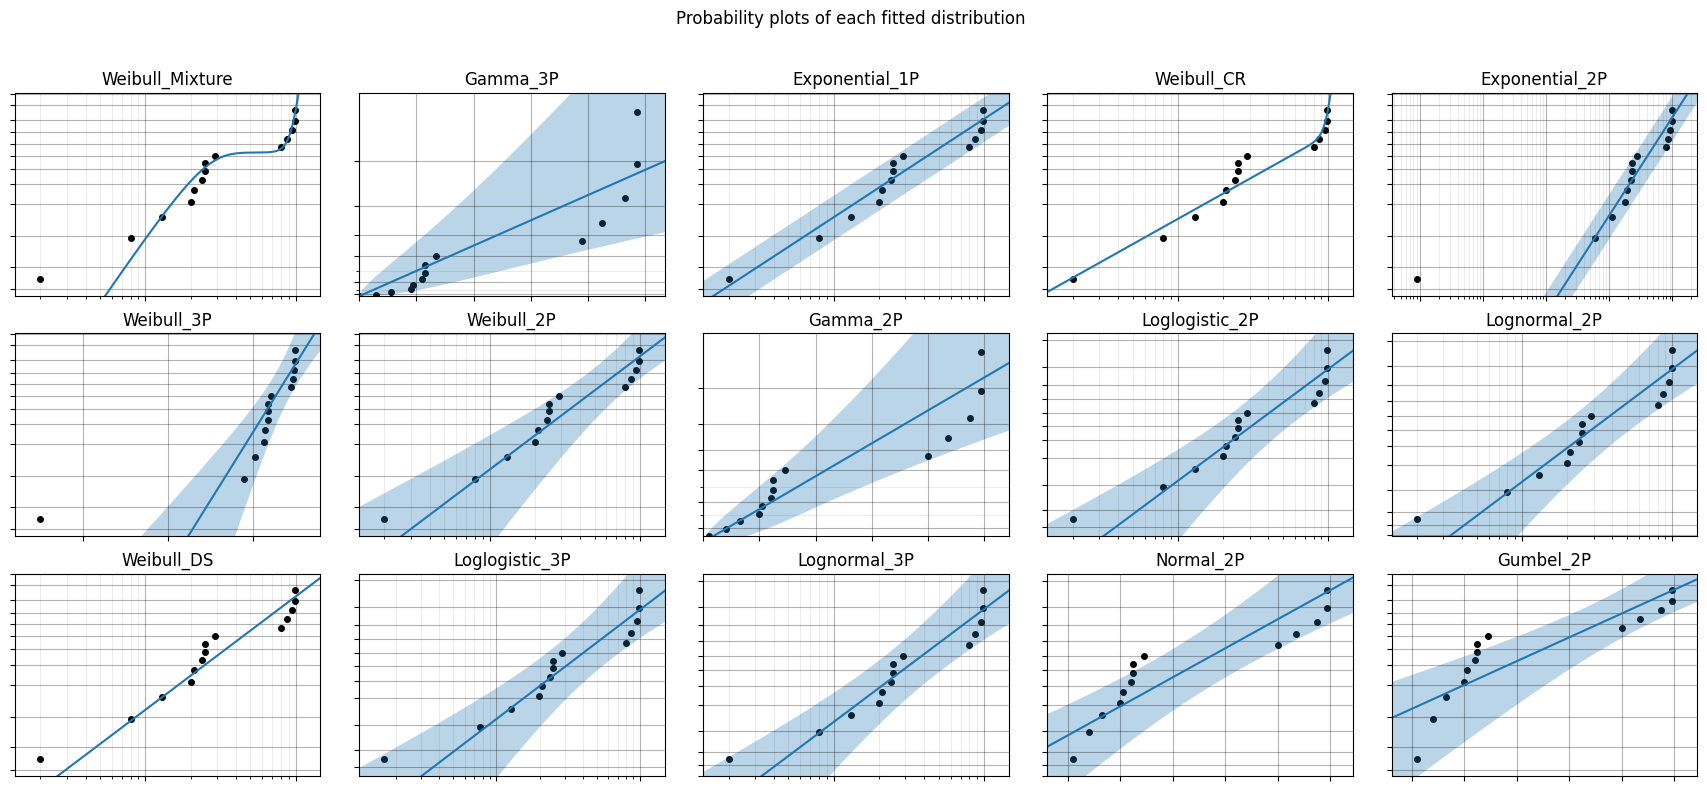

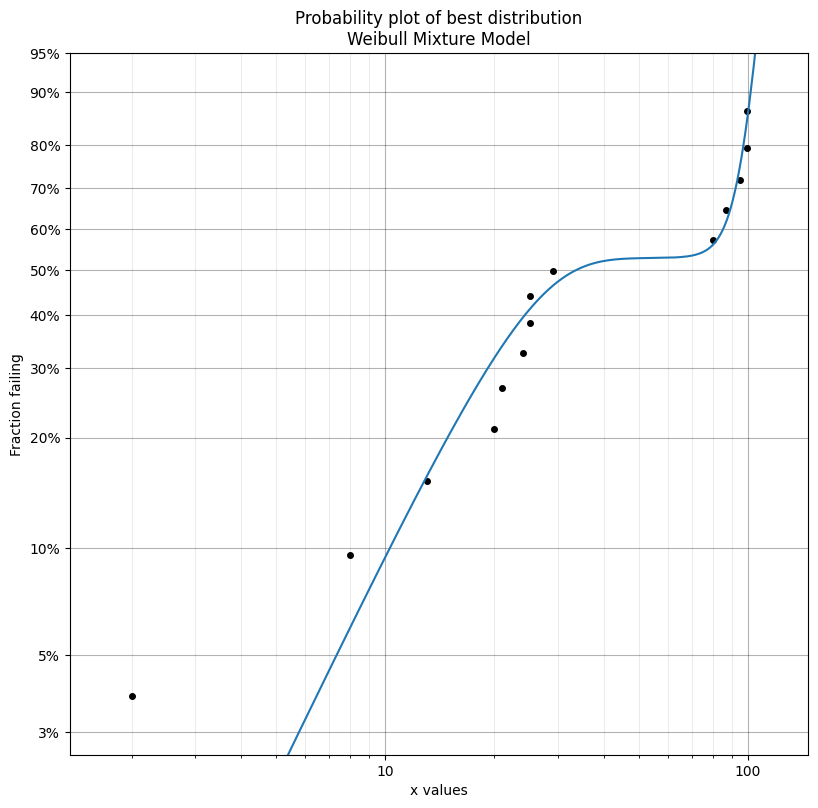

The best fit was Gamma_3P  which had parameters  [270.71853611   0.49806422   3.9999    ]


In [59]:
results_placebo = Fit_Everything(failures=data_placebo[data_placebo['cens']==1].survt.values, right_censored=data_placebo[data_placebo['cens']==0].survt.values)
print('The best fit was', results_drug.best_distribution_name, ' which had parameters ', results_drug.best_distribution.parameters)

In [62]:
results_placebo.probability_plot.savefig('protokol/img/fiteverything_placebo_PP_plots.png', dpi=dpi_for_export*10.4)

C:\Users\lenov\Documents\GitHub\ske_assignment\venv_ske\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


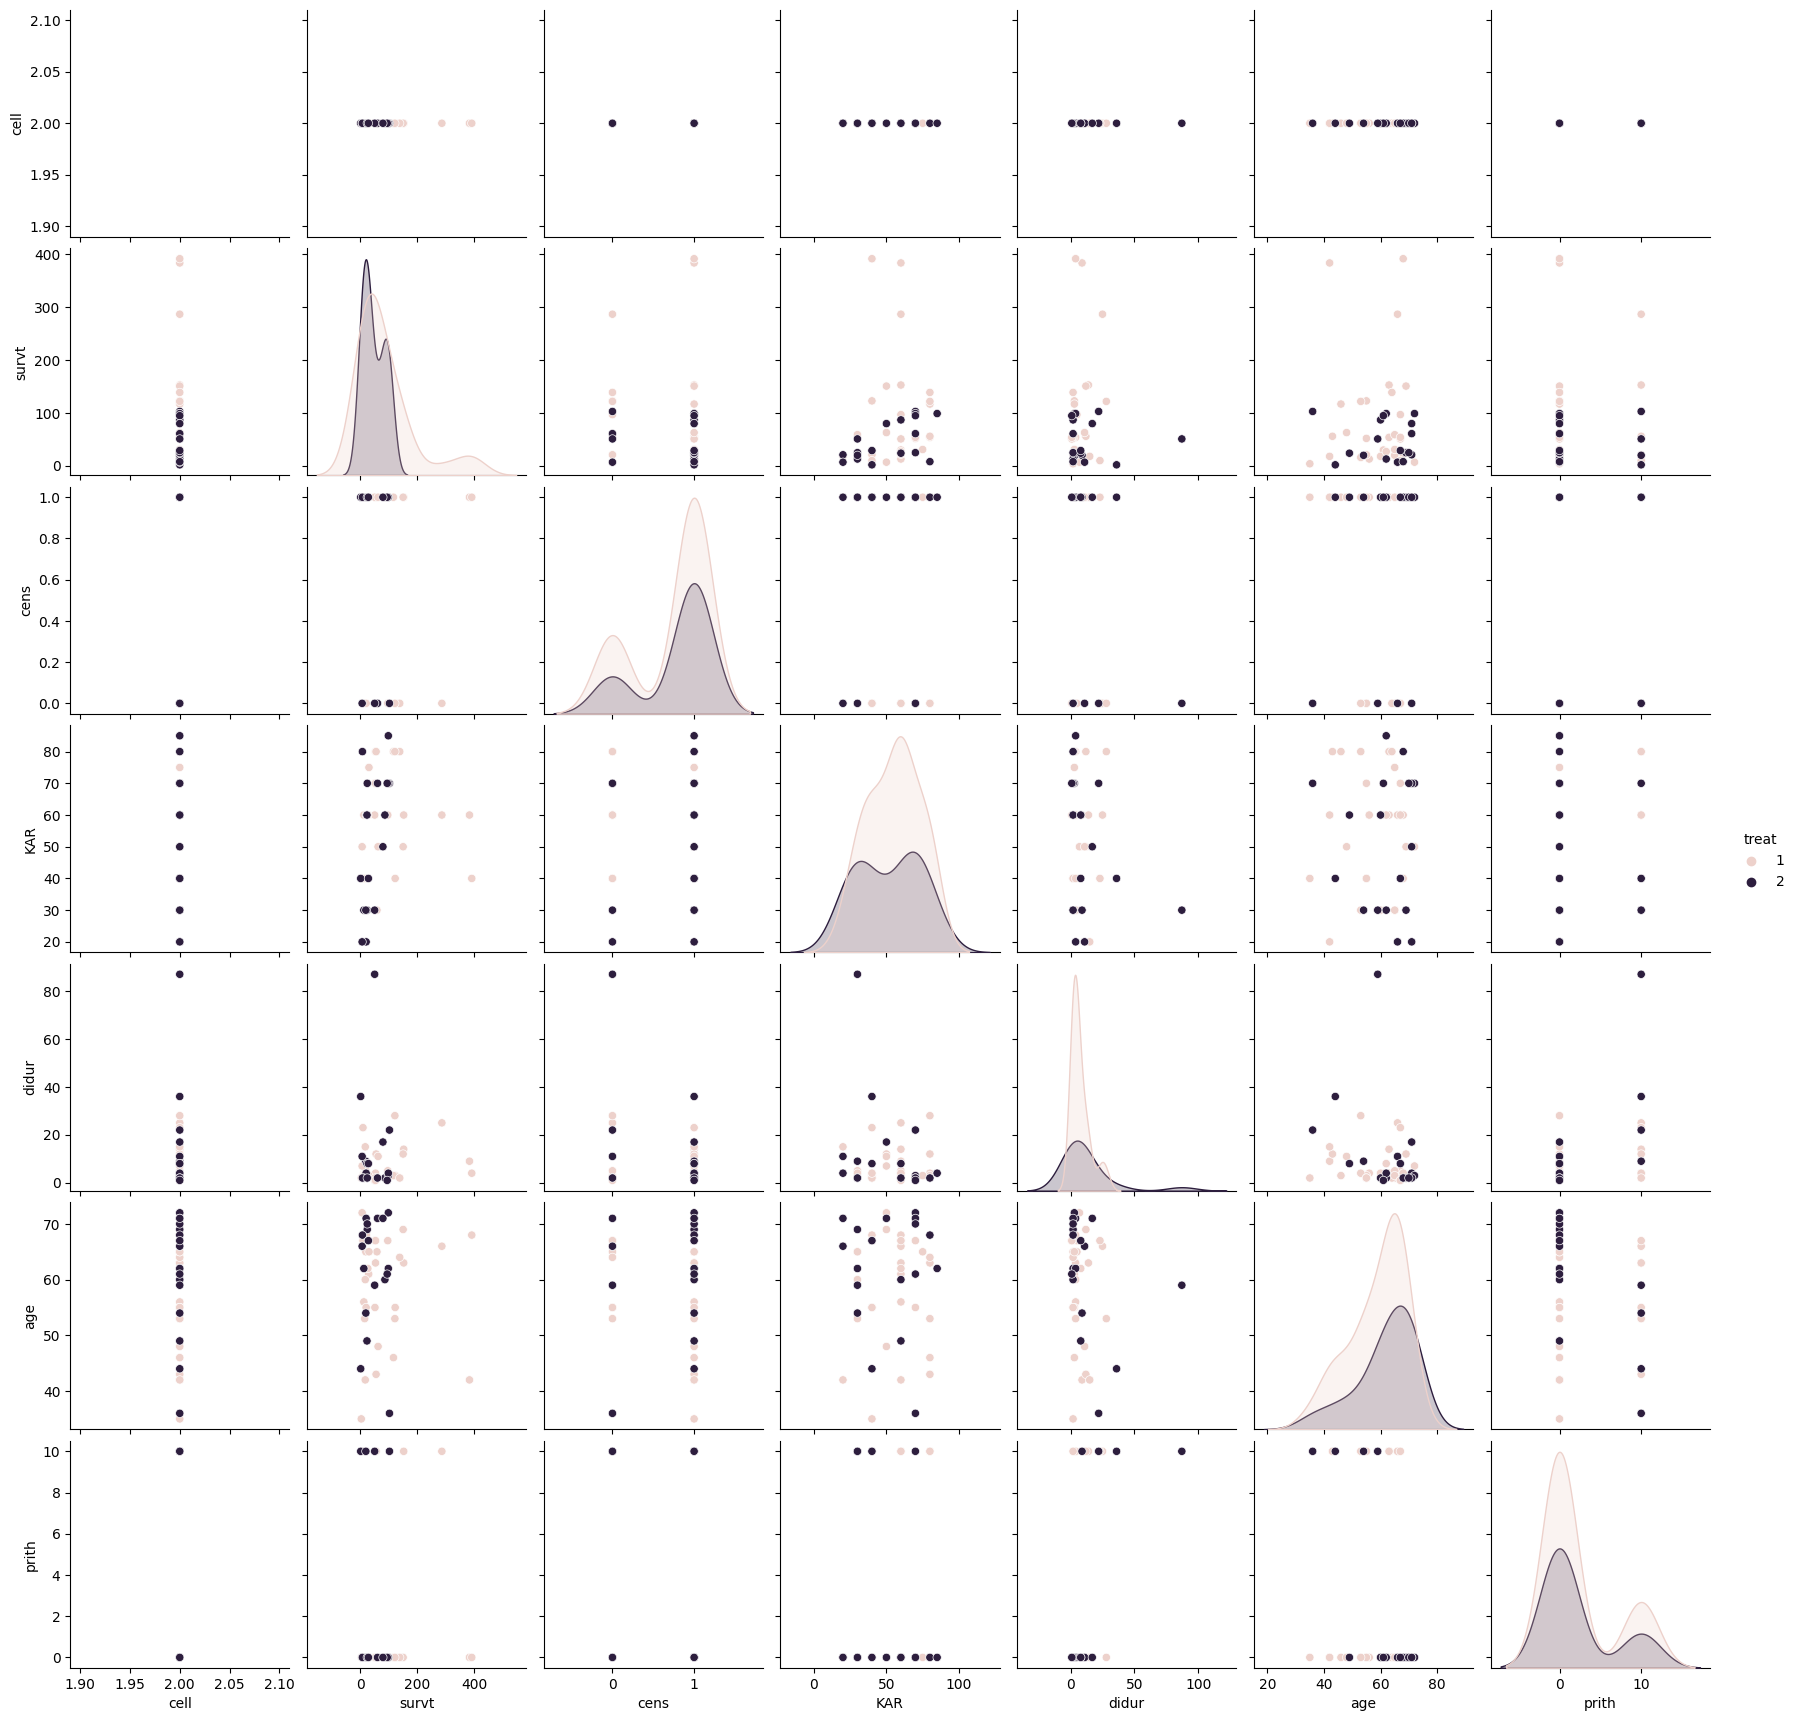

In [45]:
sbn.pairplot(data=data, hue='treat')
plt.show()